# 심화학습 : 의사결정 트리와 랜덤 포레스트

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

## 랜덤 포레스트 등장 배경 : 의사결정 트리

### 의사결정 트리 생성하기

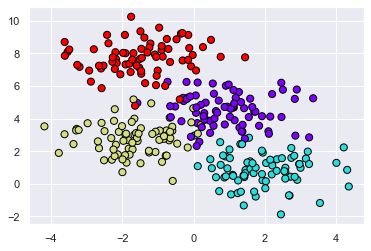

In [2]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples = 300, centers = 4, random_state = 0, cluster_std = 1.0)
plt.scatter(X[:, 0], X[:, 1], c = y, s = 50, cmap = 'rainbow', edgecolor = 'black')

In [3]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier().fit(X, y)

In [4]:
def visualize_classifier(model, X, y, ax = None, cmap = 'rainbow', edgecolor = 'black'):
    ax = ax or plt.gca()
    
    # 훈련 데이터 점 플로팅
    ax.scatter(X[:, 0], X[:, 1], c = y, s = 50, cmap = cmap, edgecolor = edgecolor, clim = (y.min(), y.max()), zorder = 3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # 모델 적합
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num = 200), np.linspace(*ylim, num = 200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    ## 결과를 이용해 컬러 플롯 생성
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha = 0.3, levels = np.arange(n_classes + 1) - 0.5, cmap = cmap, clim = (y.min(), y.max()), zorder = 1)
    ax.set(xlim = xlim, ylim = ylim)

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:18: UserWarning: The following kwargs were not used by contour: 'clim'


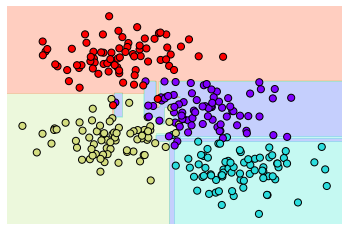

In [5]:
visualize_classifier(DecisionTreeClassifier(), X, y)

In [6]:
import helpers_05_08
helpers_05_08.plot_tree_interactive(X, y)

interactive(children=(Dropdown(description='depth', index=1, options=(1, 5), value=5), Output()), _dom_classes…

<function helpers_05_08.plot_tree_interactive.<locals>.interactive_tree(depth=5)>

### 의사결정 트리와 과적합

In [7]:
import helpers_05_08
helpers_05_08.randomized_tree_interactive(X, y)

interactive(children=(Dropdown(description='random_state', options=(0, 100), value=0), Output()), _dom_classes…

## 추정 모델의 앙상블 : 랜덤 포레스트

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:18: UserWarning: The following kwargs were not used by contour: 'clim'


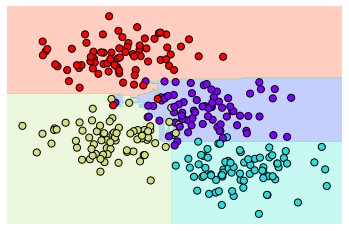

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
tree = DecisionTreeClassifier()
bag = BaggingClassifier(tree, n_estimators = 100, max_samples = 0.8, random_state = 1)
bag.fit(X, y)
visualize_classifier(bag, X, y)

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:18: UserWarning: The following kwargs were not used by contour: 'clim'


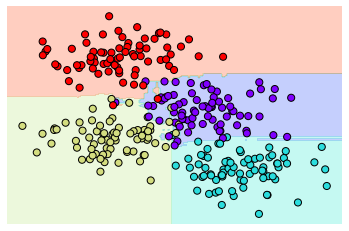

In [9]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators = 100, random_state = 0)
visualize_classifier(model, X, y)

## 랜덤 포레스트 회귀

<ErrorbarContainer object of 3 artists>

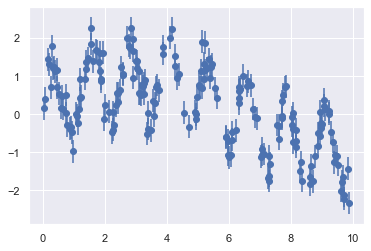

In [10]:
rng = np.random.RandomState(42)
x = 10 * rng.rand(200)

def model(x, sigma = 0.3):
    fast_oscillation = np.sin(5 * x)
    slow_oscillation = np.sin(0.5 * x)
    noise = sigma * rng.randn(len(x))
    
    return slow_oscillation + fast_oscillation + noise

y = model(x)
plt.errorbar(x, y, 0.3, fmt = 'o')

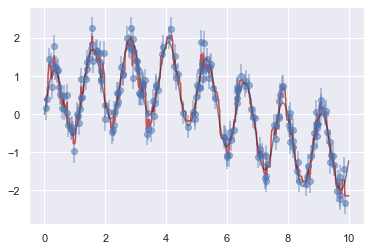

In [11]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(200)
forest.fit(x[:, None], y)

xfit = np.linspace(0, 10, 1000)
yfit = forest.predict(xfit[:, None])
ytrue = model(xfit, sigma = 0)

plt.errorbar(x, y, 0.3, fmt = 'o', alpha = 0.5)
plt.plot(xfit, yfit, '-r')
plt.plot(xfit, ytrue, '-k', alpha = 0.5)

## 예제 : 랜덤 포레스트를 사용한 숫자 분류

In [12]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

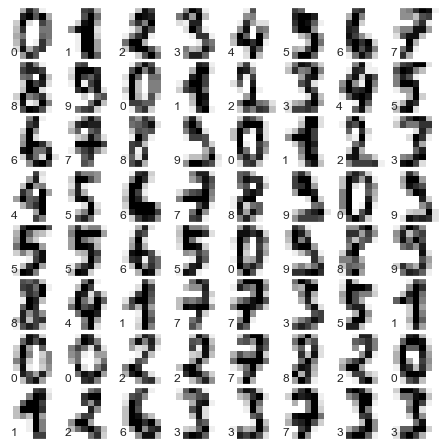

In [13]:
# 그림(figure) 설정
fig = plt.figure(figsize = (6, 6))
fig.subplots_adjust(left = 0, right = 1, bottom = 0, top = 1, hspace = 0.05, wspace = 0.05)

# 숫자 플로팅 : 각 이미지는 8x8 픽셀
for i in range(64):
    ax = fig.add_subplot(8, 8, i+1, xticks = [], yticks = [])
    ax.imshow(digits.images[i], cmap = plt.cm.binary, interpolation = 'nearest')
    
    # 대상값으로 이미지에 레이블 추가
    ax.text(0, 7, str(digits.target[i]))

In [14]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data, digits.target, random_state = 0)

model = RandomForestClassifier(n_estimators = 1000)
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)

In [15]:
from sklearn import metrics

print(metrics.classification_report(ypred, ytest))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        38
           1       0.98      0.98      0.98        43
           2       0.95      1.00      0.98        42
           3       0.98      0.96      0.97        46
           4       0.97      1.00      0.99        37
           5       0.98      0.96      0.97        49
           6       1.00      1.00      1.00        52
           7       1.00      0.96      0.98        50
           8       0.94      0.98      0.96        46
           9       0.98      0.98      0.98        47

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



Text(89.18, 0.5, 'predicted label')

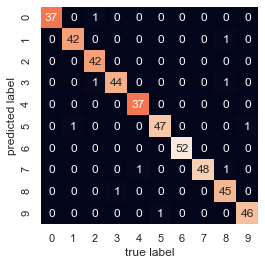

In [16]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, ypred)
sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar = False)
plt.xlabel('true label')
plt.ylabel('predicted label')

## 랜덤 포레스트 정리

1. 장점
    * 기반 의사결정 트리가 단순해서 훈련과 예측이 모두 매우 빠르다. 게다가 각 트리가 완전히 독립적인 요소이기 때문에 두 작업 모두 간단하게 병렬 처리할 수 있다.
    * 여러 개의 트리를 사용해 확률적 분류가 가능하다. 추정기로부터 얻은 가장 많은 수의 표가 확률 추정치를 제공한다. (Scikit-Learn에서 이 값은 predicted_proba() 메서드로 접근할 수 있다.)
    * 비모수 모델은 매우 유연하기 때문에 다른 추정기에서 과소적합된 작업에도 잘 동작할 수 있다.<br><br>
2. 단점
    * 결과를 쉽게 해석할 수 없다. 즉, 분류 모델의 의미에 대한 결론을 도출해야 한다면 랜덤 포레스트를 선택하는 것은 바람직하지 않다.